# **💎 Diamonds Price Prediction Using Linear Models**

## 🎯 Problem Definition

The objective of this project is to **predict the price of diamonds** using various features that describe their physical and quality characteristics. These features include:

- `carat`: Weight of the diamond
- `cut`: Quality of the cut (e.g., Ideal, Premium)
- `color`: Diamond color, graded from D (best) to J (worst)
- `clarity`: Diamond clarity (e.g., SI1, VS2)
- `depth`: Total depth percentage
- `table`: Width of the top of the diamond
- `x`, `y`, `z`: Physical dimensions in millimeters

This task is a **supervised regression problem**, where the input features are used to estimate a continuous target variable — the **price** of the diamond in USD.

We will apply different linear modeling techniques, including **Linear Regression**, **Ridge**, **Lasso**, and **ElasticNet**, to build and evaluate predictive models.

### `Imports`

In [66]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set plot style
sns.set(style='whitegrid')

from scipy.stats import zscore
from scipy.stats import f_oneway

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score


### `Load Data`

In [2]:
df = pd.read_csv(os.path.join(os.getcwd(), '..', 'dataset', 'diamonds.csv'))  # use .. to get outside src firstly
 
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [4]:
# drop unnamed 
df.drop(columns="Unnamed: 0", inplace=True)

## `EDA`

In [5]:
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [6]:
df.shape

(53940, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


- **No Nulls**
- **Columns dtypes are correctly defined**

**NUMERICAL COLUMNS**

In [8]:
# All numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Exclude 'price' (target)
numeric_cols = numeric_cols.drop('price')

In [9]:
# statastical summary for numerical columns
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [10]:
# ranges of data
ranges = df[numeric_cols].agg(['min', 'max']).T
ranges.columns = ['Min', 'Max']
ranges['Range'] = ranges['Max'] - ranges['Min']
ranges

,Min,Max,Range
carat,0.2,5.01,4.81
depth,43.0,79.00,36.00
table,43.0,95.00,52.00
x,0.0,10.74,10.74
y,0.0,58.90,58.90
z,0.0,31.80,31.80


- **Different ranges -> Will require Standarization later**

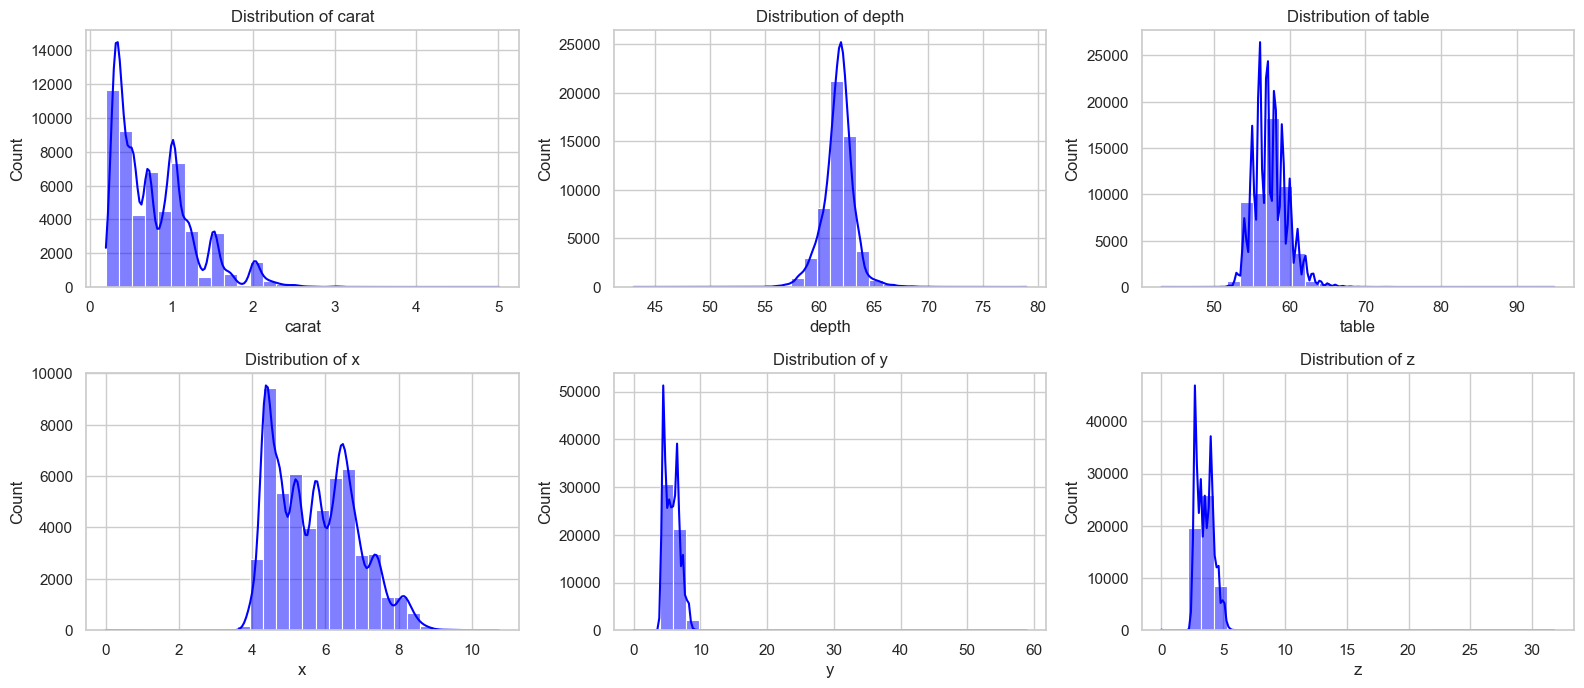

In [11]:
# Plot distribution for each numeric feature
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


- **cart feature is left-skewed**

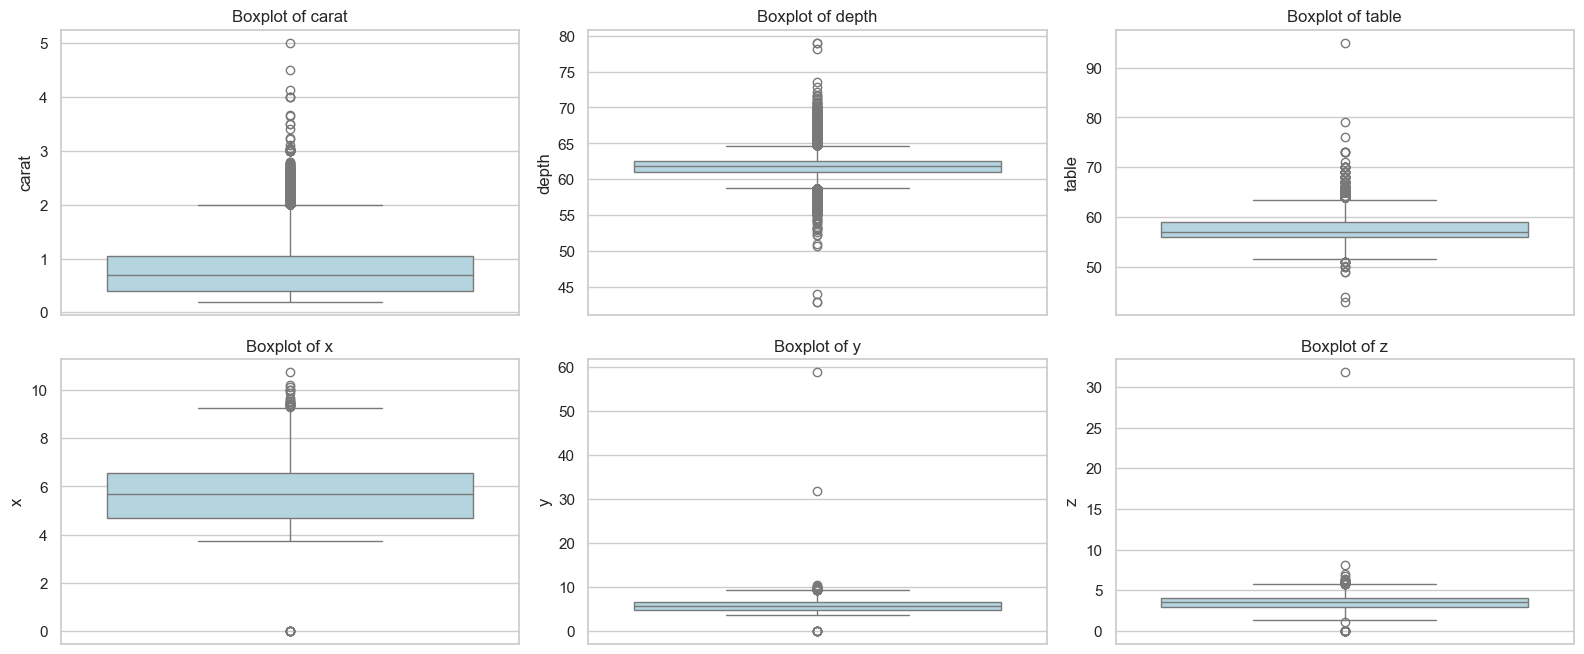

In [12]:
# check for Outliers
plt.figure(figsize=(16, 10))
for i, col in enumerate(df[numeric_cols].columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=col, color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

In [13]:
# Detect outliers using IQR
outlier_summary = {}

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

# display number of outliers per feature
pd.Series(outlier_summary).sort_values(ascending=False)


price    3540
depth    2545
carat    1889
table     605
z          49
x          32
y          29
dtype: int64

- **it seems to be large number of outliers**
- **will use Z-Score too**

In [14]:
z_scores = df[numeric_cols].apply(zscore)

# Threshold for 95% confidence (~1.96)
threshold = 1.96

# Count outliers for each column
z_outlier_summary = (abs(z_scores) > threshold).sum()

# Show sorted results
z_outlier_summary.sort_values(ascending=False)


table    3119
depth    3104
carat    2509
x        2074
z        1962
y        1898
dtype: int64

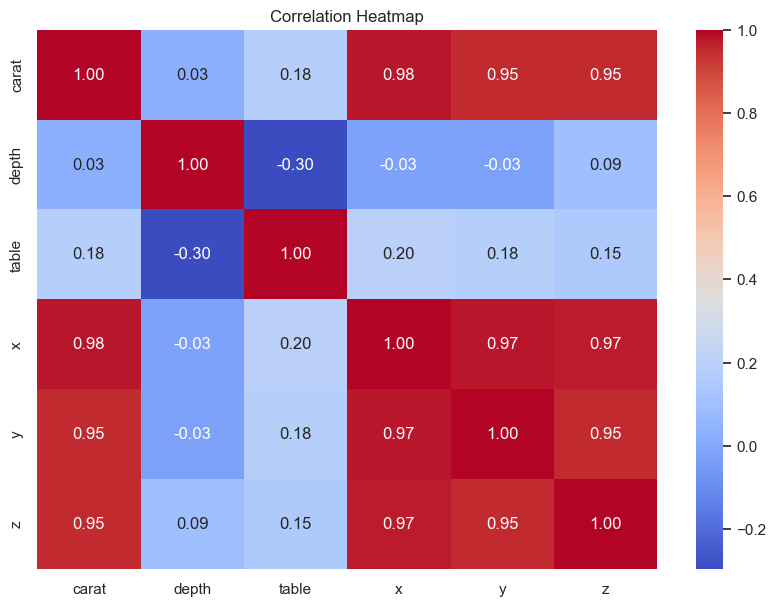

In [15]:
# relation between features 
plt.figure(figsize=(10, 7))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- **required to be independebt as possible -> so we can use only one of highly correlated features or use PCA**
- **not prefered here as no. of features is small**

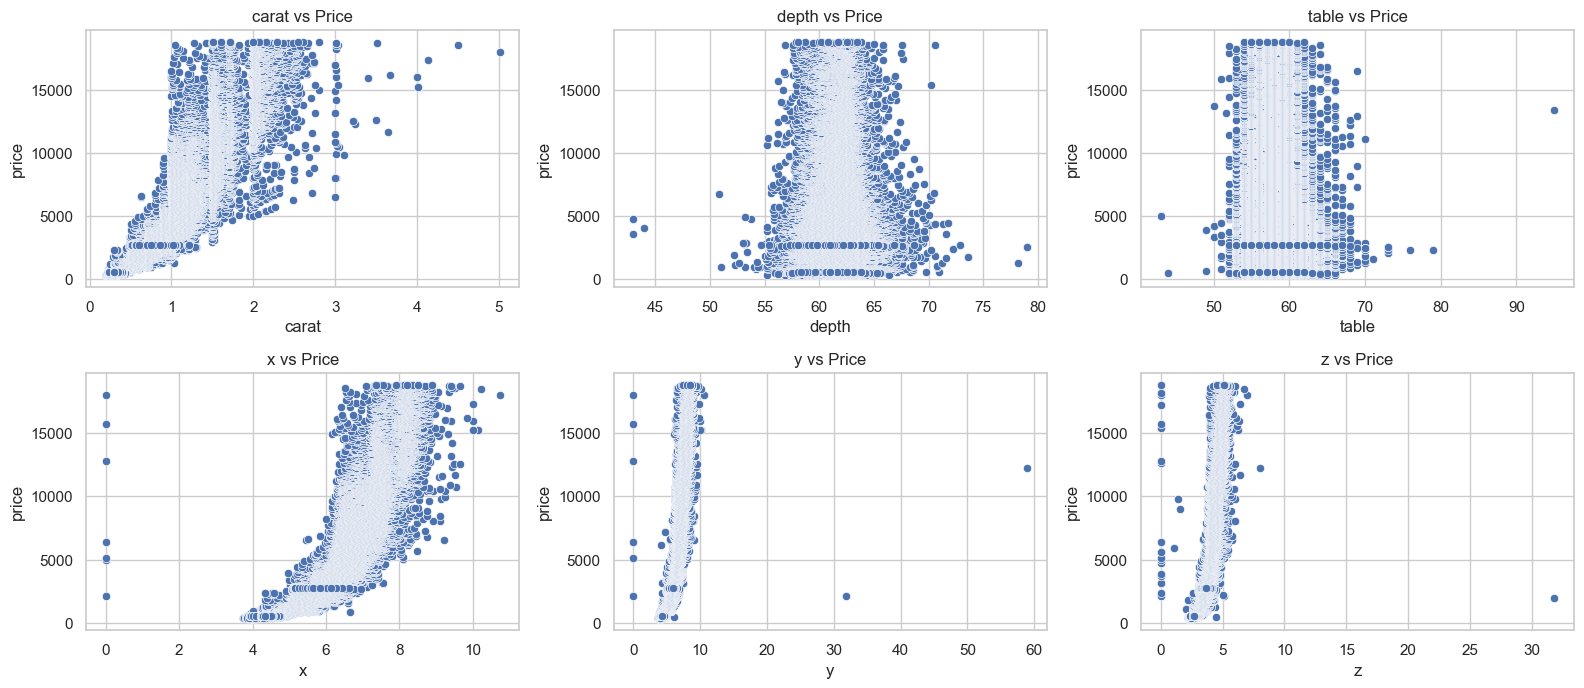

In [16]:
# check relation between each feature and the target 
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=col, y='price', data=df)
    plt.title(f'{col} vs Price')
    plt.tight_layout()

plt.show()

In [17]:
# Correlation between each numeric feature and the target (price)
correlations = df[numeric_cols].corrwith(df['price']).sort_values(ascending=False)

# Display as a DataFrame
correlations_df = correlations.to_frame(name='Correlation with Price')
correlations_df


,Correlation with Price
carat,0.921591
x,0.884435
y,0.865421
z,0.861249
table,0.127134
depth,-0.010647


C:\Users\laphouse\AppData\Local\Temp\ipykernel_35816\2181892546.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')


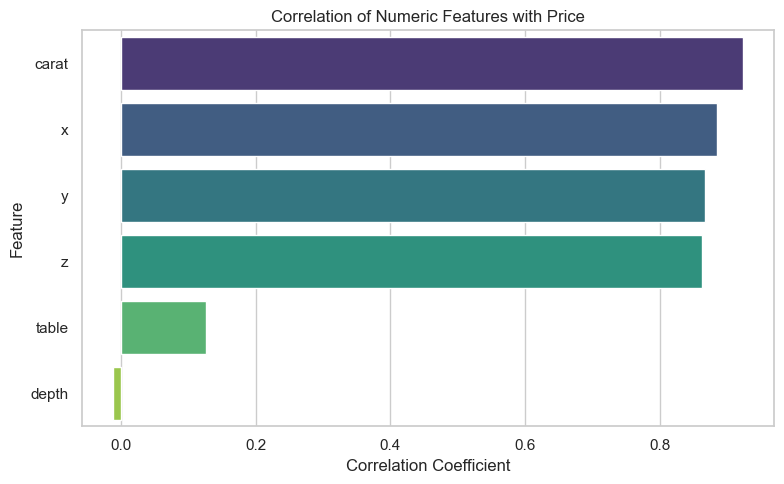

In [18]:
# display using barplot
plt.figure(figsize=(8, 5))
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')
plt.title('Correlation of Numeric Features with Price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

- **Will drop `depth` feature as its not correlated with target at all**

In [19]:
df.drop(columns="depth", inplace=True)

In [20]:
# check
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'price', 'x', 'y', 'z'], dtype='object')

**CATEGORICAL COLUMNS**

In [21]:
# categorical columns
categ_cols = df.select_dtypes(include='object').columns

In [22]:
df[categ_cols].nunique()

cut        5
color      7
clarity    8
dtype: int64

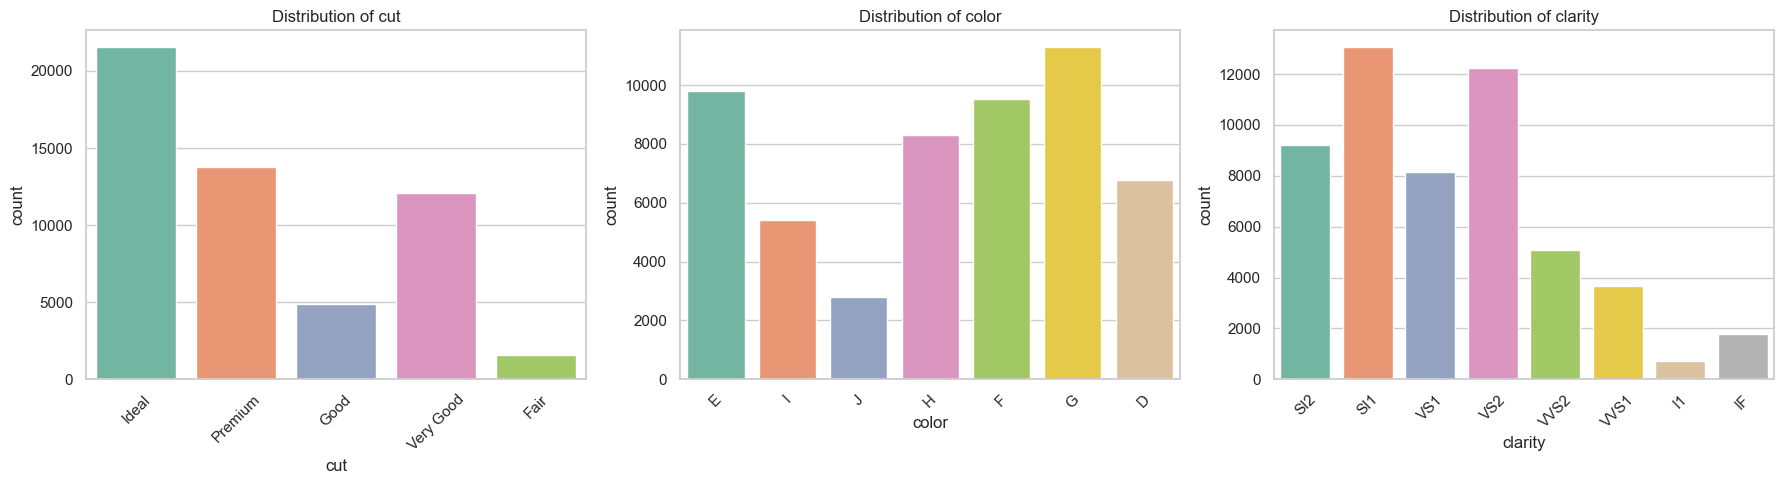

In [23]:
plt.figure(figsize=(18, 5))

for i, col in enumerate(categ_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=col, data=df, hue=col, palette='Set2', legend=False)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [24]:
# ANOVA to check on realtion between ctaegorical columns and price 

for col in categ_cols:
    groups = [df[df[col] == category]['price'] for category in df[col].unique()]
    f_stat, p_val = f_oneway(*groups)
    print(f"{col}: F = {f_stat:.2f}, p = {p_val:.4f}")


cut: F = 175.69, p = 0.0000
color: F = 290.21, p = 0.0000
clarity: F = 215.02, p = 0.0000


- **All have zero P -> strongly effect price**

### `Data Cleaning`

In [25]:
df.head()

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75


In [26]:
# check for nulls in entire datasets
df.isna().sum().sum()

0

- `note:` All columns have suitable data types, ensuring that the dataset is free from invalid entries



In [27]:
# check for duplicated rows
df.duplicated().sum()

148

In [28]:
# drop duplicated 
df.drop_duplicates()

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,58.0,2757,6.15,6.12,3.74


In [29]:
# drop outliers

# Define threshold for 97% confidence
print(f"Original dataset shape: {df.shape}")

# Define threshold for 97% confidence
threshold = 2.17

# Compute Z-scores for numeric columns
numeric_cols = df.select_dtypes(include='number').columns
z_scores = df[numeric_cols].apply(zscore)

mask = (np.abs(z_scores) < threshold).all(axis=1)
df = df[mask].reset_index(drop=True)   # inplace=True

print(f"After removing Z-score outliers: {df.shape}")

Original dataset shape: (53940, 9)
After removing Z-score outliers: (49236, 9)


## `Preprocessing`

In [30]:
# handle skewed 
# prepare to X and y for spliting
# split  
# encode categ
# standradization numeric

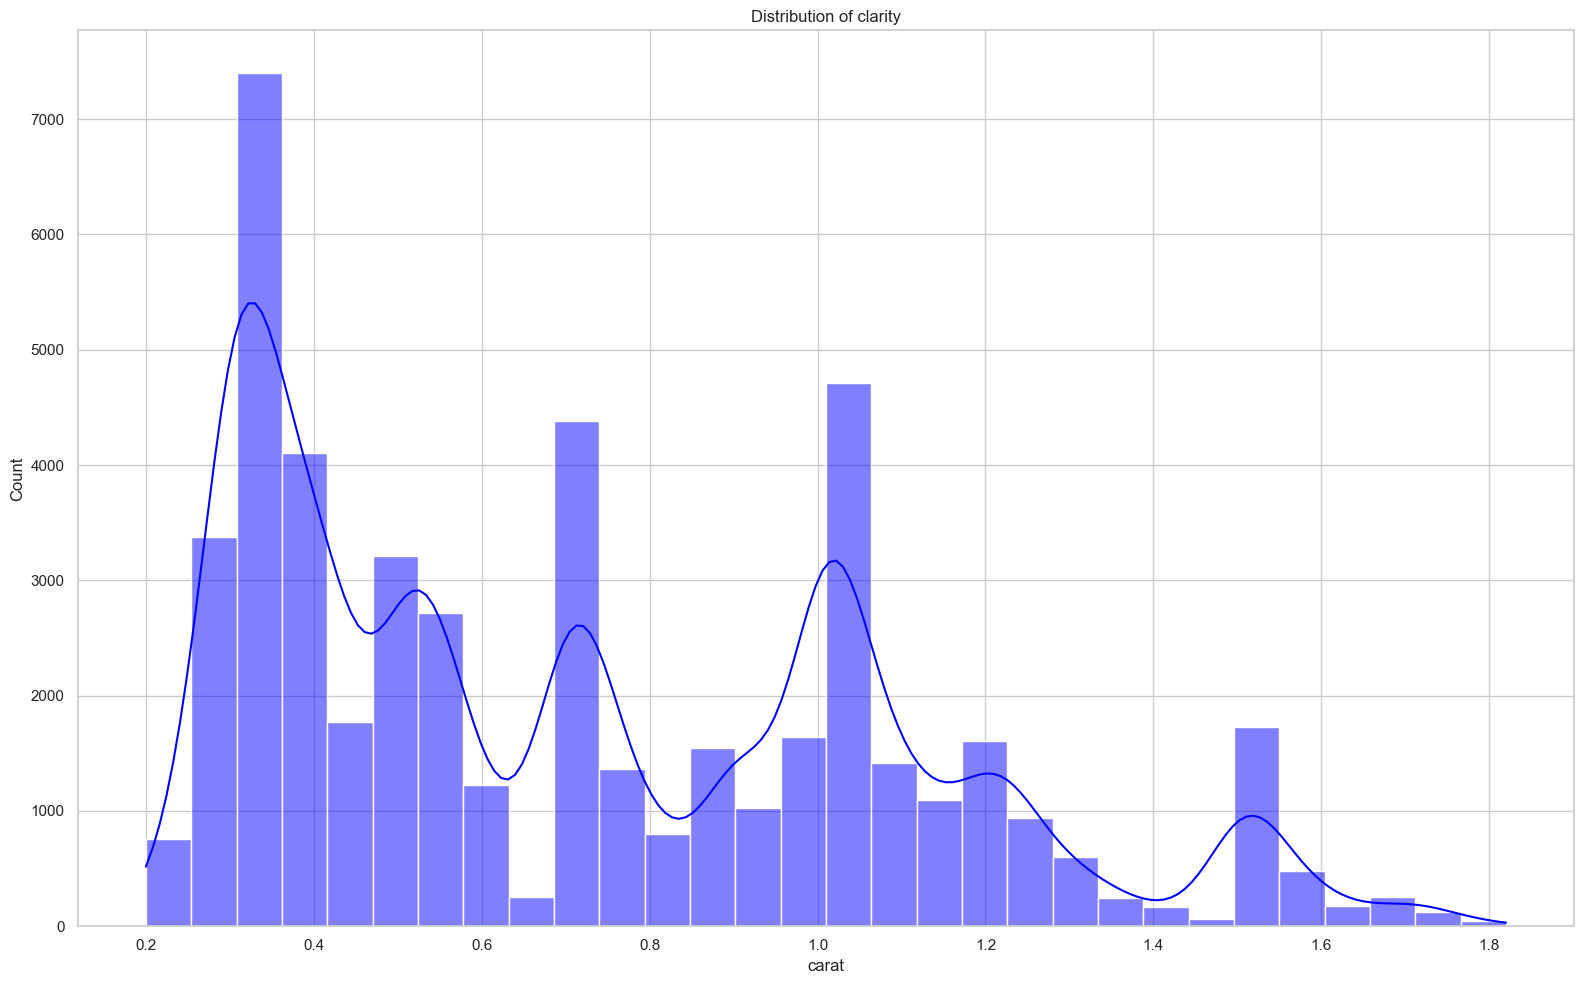

In [31]:
# Distribution of original column
plt.figure(figsize=(16, 10))
sns.histplot(df["carat"], kde=True, color='blue', bins=30)
plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


In [32]:
# already known from EDA that carat is left-skewed
col = 'carat'

# log transform to reduce left skewness
df[f'{col}_log_transformed'] = np.log(df[col])

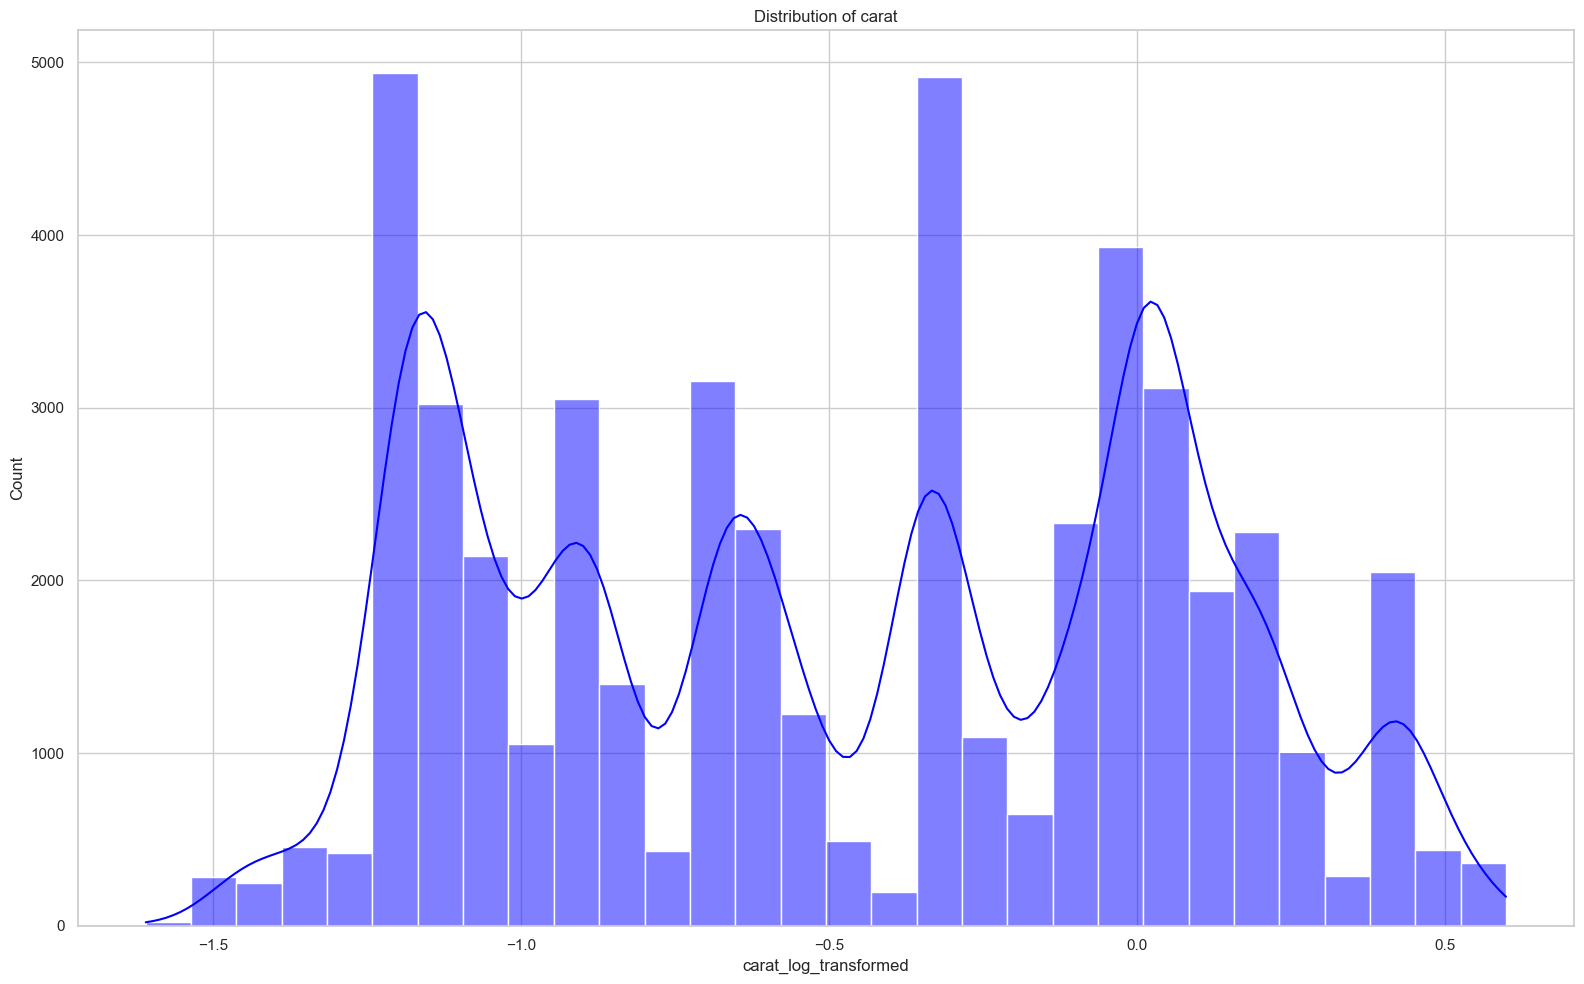

In [33]:
# Distribution of new column
plt.figure(figsize=(16, 10))
sns.histplot(df["carat_log_transformed"], kde=True, color='blue', bins=30)
plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [34]:
# prepare data frames
X = df.drop(columns=['price', 'carat'], axis=1)   # drop target and left skewed carat 
y = df['price']    # target variable

In [35]:
# check 
X.head()

,cut,color,clarity,table,x,y,z,carat_log_transformed
0,Ideal,E,SI2,55.0,3.95,3.98,2.43,-1.469676
1,Premium,E,SI1,61.0,3.89,3.84,2.31,-1.560648
2,Premium,I,VS2,58.0,4.20,4.23,2.63,-1.237874
3,Good,J,SI2,58.0,4.34,4.35,2.75,-1.171183
4,Very Good,J,VVS2,57.0,3.94,3.96,2.48,-1.427116


In [36]:
# split into training (80%) and testing (20%) sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

In [37]:
# check on new sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (39388, 8)
X_test shape: (9848, 8)
y_train shape: (39388,)
y_test shape: (9848,)


In [38]:
# define preprocessing pipeline 
# standradization for numerical and OHE for categorical

# Separate features
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include='number').columns.tolist()

# Define transformers
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_cols)    # drop='first' to avoid sparsity
])

In [ ]:
# apply prepocessing on train split 
X_train_preprocessed = preprocessor.fit_transform(X_train) 
X_test_preprocessed = preprocessor.transform(X_test)

In [40]:
X_train_preprocessed  # return numpy array as its required for sklearn model

array([[ 0.36520353,  0.32606702,  0.29363281, ...,  0.        ,
         0.        ,  0.        ],
       [-0.13837029,  0.09230725,  0.12997191, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.36520353,  1.62699098,  1.57223361, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.13837029, -0.48701045, -0.47352767, ...,  0.        ,
         0.        ,  1.        ],
       [ 2.3794988 ,  0.14312459,  0.09928549, ...,  0.        ,
         0.        ,  0.        ],
       [-0.64194411,  1.2001253 ,  1.27559822, ...,  0.        ,
         0.        ,  0.        ]])

## `Train and Evalute`

In [54]:
# define function to calculate adjusted R-squared
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

- Linear Regression

In [55]:
# initialize anf fit model
lr = LinearRegression()
lr.fit(X_train_preprocessed, y_train)

LinearRegression()

In [57]:
# predict
y_pred_lr = lr.predict(X_test_preprocessed)

# Evaluation metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
adj_r2_lr = adjusted_r2(r2_lr, X_test_preprocessed.shape[0], X_test_preprocessed.shape[1])

print("Linear Regression Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.4f}")
print(f"R-squared (R²): {r2_lr:.4f}")
print(f"Adjusted R-squared: {adj_r2_lr:.4f}")

Linear Regression Evaluation Metrics:
Mean Squared Error (MSE): 681111.8121
Root Mean Squared Error (RMSE): 825.2950
R-squared (R²): 0.9137
Adjusted R-squared: 0.9135


- Ridge

In [58]:
# Initialize and train
ridge = Ridge()
ridge.fit(X_train_preprocessed, y_train)

Ridge()

In [59]:
# Predict
y_pred_ridge = ridge.predict(X_test_preprocessed)

# Evaluation metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
adj_r2_ridge = adjusted_r2(r2_ridge, X_test_preprocessed.shape[0], X_test_preprocessed.shape[1])

print("Linear Regression Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_ridge:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:.4f}")
print(f"R-squared (R²): {r2_ridge:.4f}")
print(f"Adjusted R-squared: {adj_r2_ridge:.4f}")

Linear Regression Evaluation Metrics:
Mean Squared Error (MSE): 681006.6236
Root Mean Squared Error (RMSE): 825.2313
R-squared (R²): 0.9137
Adjusted R-squared: 0.9135


- Lasso


In [61]:
# Initialize and train
lasso = Lasso(max_iter=5000)  # increase max_iter for convergence
lasso.fit(X_train_preprocessed, y_train)

Lasso(max_iter=5000)

In [62]:
# Predict
y_pred_lasso = lasso.predict(X_test_preprocessed)

# Evaluate
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
adj_r2_lasso = adjusted_r2(r2_lasso, X_test_preprocessed.shape[0], X_test_preprocessed.shape[1])

print("Lasso Regression Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_lasso:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.4f}")
print(f"R-squared (R²): {r2_lasso:.4f}")
print(f"Adjusted R-squared: {adj_r2_lasso:.4f}")

Lasso Regression Evaluation Metrics:
Mean Squared Error (MSE): 687377.4210
Root Mean Squared Error (RMSE): 829.0823
R-squared (R²): 0.9129
Adjusted R-squared: 0.9127


- Elastic Net

In [67]:
# Initialize and train
elasticnet = ElasticNet(max_iter=5000)
elasticnet.fit(X_train_preprocessed, y_train)

ElasticNet(max_iter=5000)

In [68]:
# Predict
y_pred_en = elasticnet.predict(X_test_preprocessed)

# Evaluate
mse_en = mean_squared_error(y_test, y_pred_en)
rmse_en = np.sqrt(mse_en)
r2_en = r2_score(y_test, y_pred_en)
adj_r2_en = adjusted_r2(r2_en, X_test_preprocessed.shape[0], X_test_preprocessed.shape[1])

print("ElasticNet Regression Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_en:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_en:.4f}")
print(f"R-squared (R²): {r2_en:.4f}")
print(f"Adjusted R-squared: {adj_r2_en:.4f}")

ElasticNet Regression Evaluation Metrics:
Mean Squared Error (MSE): 1588394.2384
Root Mean Squared Error (RMSE): 1260.3151
R-squared (R²): 0.7986
Adjusted R-squared: 0.7982


# Comparision

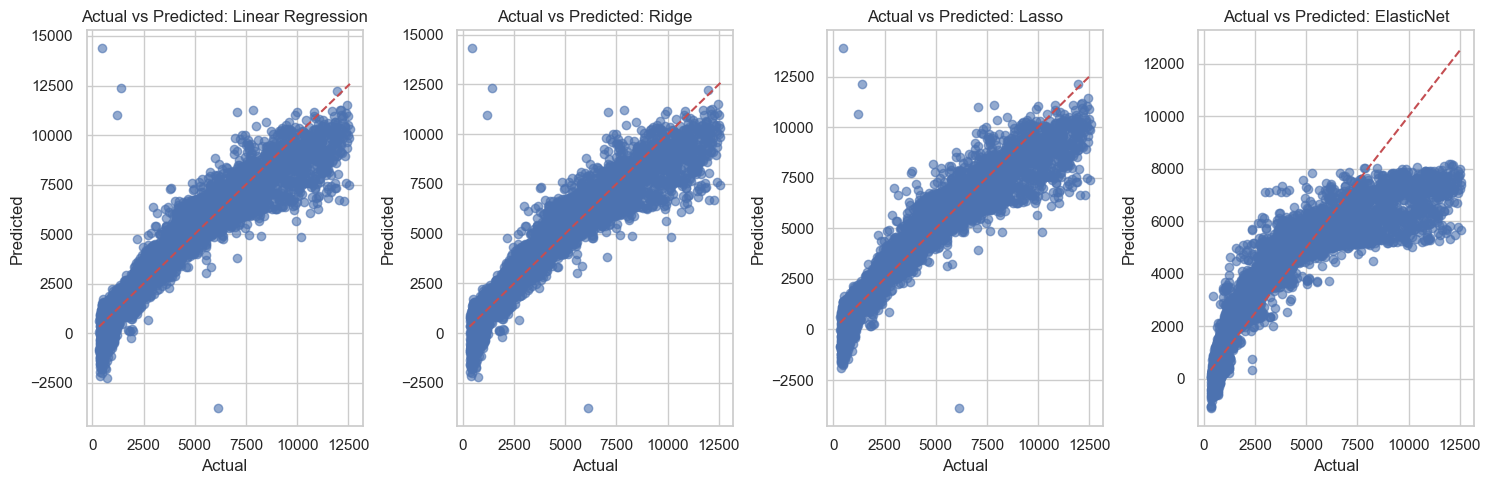

In [70]:
def plot_actual_vs_predicted(y_true, preds, model_names):
    plt.figure(figsize=(15, 5))
    for i, (y_pred, name) in enumerate(zip(preds, model_names), 1):
        plt.subplot(1, len(preds), i)
        plt.scatter(y_true, y_pred, alpha=0.6)
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title(f'Actual vs Predicted: {name}')
        plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_actual_vs_predicted(
    y_test,
    [y_pred_lr, y_pred_ridge, y_pred_lasso, y_pred_en],
    ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet']
)


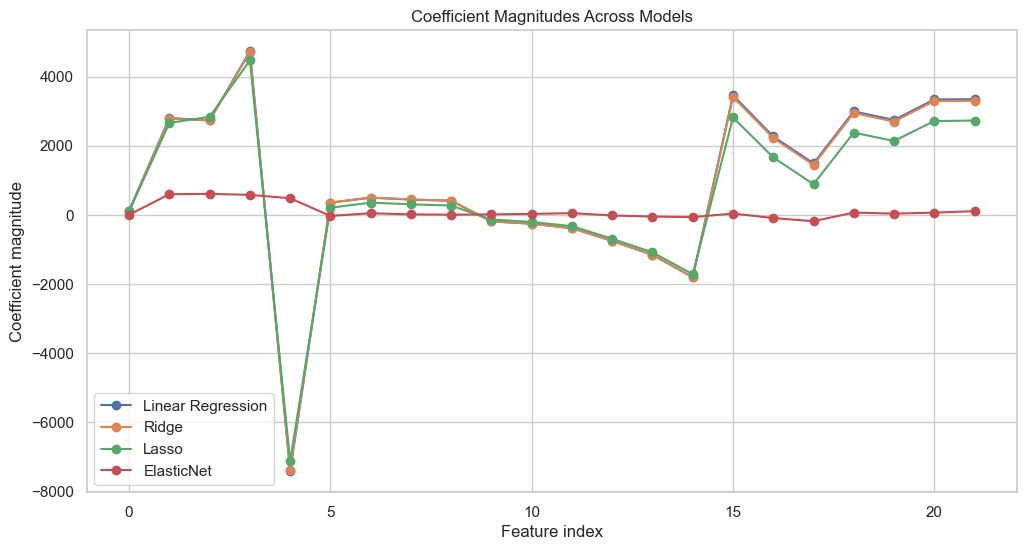

In [72]:
# Extract coefficients (note: all have same length after preprocessing)
coefs = {
    'Linear Regression': lr.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_,
    'ElasticNet': elasticnet.coef_
}

plt.figure(figsize=(12, 6))
for name, coef in coefs.items():
    plt.plot(coef, marker='o', linestyle='-', label=name)
plt.xlabel('Feature index')
plt.ylabel('Coefficient magnitude')
plt.title('Coefficient Magnitudes Across Models')
plt.legend()
plt.grid(True)
plt.show()


- **All nearly same preformance Except Elastic Net**
- may need more tuning for hyperparameters